## File parser - section 4
In this notebook, we will learn how to access binary data. As a first example, we will use a single binary file originating from a more complex data structure within a project folder.

A normal text editor will have problems to deal with `data004.qlw`, since its content is not meant to be represented as ASCII characters. Instead, you will see something like `    àè@     ç@     àå@     Ëå@     Äå@     `, the text editors try to interpret binary data in ASCII.

It is recommended to use a hex editor for binary data exploration. I'm using
Hex Fiend on MacOS  --> [download here](https://hexfiend.com)
GHex on Linux -->    `sudo apt-get install ghex`
On Windows I have no experience; please check [this wiki page](https://en.wikipedia.org/wiki/Comparison_of_hex_editors)

Opening the file in a hex editor, you will see [this](https://hessenbox-a10.rz.uni-frankfurt.de/dl/fiAVKaDMHK84sbcpmZz4UB/2.png?inline).
First of all, I have hidden all 0 bytes, i.e. bytes having stored 0 as information are not showing up.
Data obviously starts at byte position 32, whereas the first 0-31 bytes seem to keep a header of block information.
Starting from byte 32, data is stored as 8-byte portions, the first of which is highlighted in the hex editor screenshot.
In Python, the `struct` module enables to interpret bytes. Possible encodings are found [here](https://docs.python.org/3/library/struct.html#format-characters), for scientific data we mostly just need
- `h`, 2 byte integer
- `H`, unsigned 2 byte integer (only positive values: 0,1,2,...)
- `i`, 4 byte integer
- `I`, unsigned 4 byte integer
- `f`  4 byte float
- `d`  8 byte float (referred to as "double")

On the lower end of the [screenshot](https://hessenbox-a10.rz.uni-frankfurt.de/dl/fiAVKaDMHK84sbcpmZz4UB/2.png?inline), you can see how the resulting encoded value would look like for different encoding schemes; little-endian 8 byte float seems to yield the only meaningful result=`1009`.


`Floats - le` and `Floats - be` represent little-endian and big-endian, respectively, which means that the bytes are interpreted either starting at the first byte, or at the last byte, [more details](https://en.wikipedia.org/wiki/Endianness).





In python, reading in binary content is equivalent to reading in ASCII characters. When using `with open(filePath)...`, you just need to specify that the content is binary: `with open(filePath, 'rb')...` where `'rb'` means 'read bytes'.

- define filePath to reach your data file
- read the binary content into the `fileBinary` variable
- print `fileBinary` out


In [1]:


filePath = '../data/data004.qlw'
with open(filePath, 'rb') as file:
    fileBinary = file.read()

print(fileBinary)


b'\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x88\x8f@\x00\x00\x00\x00\x00`\x8d@\x00\x00\x00\x00\x00\x88\x8c@\x00\x00\x00\x00\x00\xe8\x8c@\x00\x00\x00\x00\x00\x80\x8c@\x00\x00\x00\x00\x00\xc8\x8b@\x00\x00\x00\x00\x00\x08\x8d@\x00\x00\x00\x00\x00\xd0\x8b@\x00\x00\x00\x00\x00h\x8b@\x00\x00\x00\x00\x00H\x8b@\x00\x00\x00\x00\x00\xc8\x8a@\x00\x00\x00\x00\x00\xb8\x8c@\x00\x00\x00\x00\x00X\x8a@\x00\x00\x00\x00\x00\xf0\x89@\x00\x00\x00\x00\x00\xd8\x8a@\x00\x00\x00\x00\x00\xe8\x89@\x00\x00\x00\x00\x00\x08\x8a@\x00\x00\x00\x00\x00\xb0\x88@\x00\x00\x00\x00\x00(\x8a@\x00\x00\x00\x00\x00\x18\x89@\x00\x00\x00\x00\x00\xb0\x88@\x00\x00\x00\x00\x00X\x8a@\x00\x00\x00\x00\x00H\x88@\x00\x00\x00\x00\x00\xd8\x87@\x00\x00\x00\x00\x00\xf0\x87@\x00\x00\x00\x00\x008\x88@\x00\x00\x00\x00\x00@\x88@\x00\x00\x00\x00\x00@\x8a@\x00\x00\x00\x00\x00\xf0\x87@\x00\x00\x00\x00\x00\x18\x87@\x00\x00\x00\x00\x00p\x89@\x00

Bytes can be de-/encoded using the `struct` module (python standard library).
As a first try, grab the first 8 bytes of `fileBinary` and try out to decode it as `integer` or `float` in both, little-endian and big-endian.

- import struct
- assign the first 8 bytes to another variable, e.g. `portion`
- print `portion`
- decode `portion` using `struct.unpack(FORMAT, fileBinary)`, with e.g. `FORMAT="<q"` for a signed 8 byte integer.
Please note, that `struct.unpack()` returns a tuple; when unpacking a single value, you will receive it by accessing the first entry, i.e., `struct.unpack(FORMAT, fileBinary)[0]`


In [2]:
import struct

portion = fileBinary[:8]

print(len(portion))
print(portion)

print(struct.unpack('<q', portion)[0])
print(struct.unpack('>q', portion)[0])
print(struct.unpack('<d', portion)[0])
print(struct.unpack('>d', portion)[0])

length 8
portion b'\x01\x00\x00\x00\x00\x00\x00\x00'
1
72057594037927936
5e-324
7.291122019556398e-304


Now, let's check the data entries behind the header block.

- assign the portion of interest (without the header block) to a new variable `dataPortion`
- create an empyt list `values`
- create a loop, which iteratively decodes chunks of 8 bytes each from `dataPortion` and append the resulting value to `values`
- import matplotlib
- plot `values`


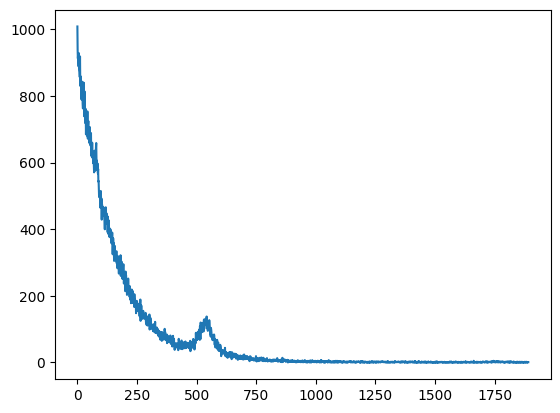

In [3]:
dataPortion = fileBinary[32:]
values = []


for i in range(0,len(dataPortion)-8,8):
    #print(i, i+8)
    portion = dataPortion[i:i+8]
    values.append(struct.unpack('<d', portion)[0])


import matplotlib.pyplot as plt
plt.plot(values)
plt.show()

The `struct.unpack()` function as also capable of converting multiple chunks at the same time into a single tuple. In order to do so, you need to define the formatting string appropriately, matching the amount of bytes.

- create a variable `nBytes` and assign to it the number of bytes within `dataPortion`
- define a `format` variable, which starts with the endianness (`<`), followd by as many `d`'s as needed to unpack every value
- use this `format` in combination with the whole `dataPortion` binary content within `struct.unpack()` and assign the return tuple to `values`
- plot `values`

(1009.0, 940.0, 913.0, 925.0, 912.0, 889.0, 929.0, 890.0, 877.0, 873.0, 857.0, 919.0, 843.0, 830.0, 859.0, 829.0, 833.0, 790.0, 837.0, 803.0, 790.0, 843.0, 777.0, 763.0, 766.0, 775.0, 776.0, 840.0, 766.0, 739.0, 814.0, 759.0, 749.0, 719.0, 762.0, 750.0, 685.0, 735.0, 728.0, 704.0, 689.0, 681.0, 754.0, 678.0, 672.0, 714.0, 725.0, 674.0, 699.0, 660.0, 682.0, 673.0, 707.0, 670.0, 652.0, 654.0, 656.0, 689.0, 621.0, 621.0, 651.0, 618.0, 660.0, 618.0, 614.0, 623.0, 599.0, 598.0, 606.0, 593.0, 571.0, 584.0, 636.0, 575.0, 611.0, 632.0, 609.0, 634.0, 648.0, 659.0, 612.0, 598.0, 606.0, 577.0, 586.0, 597.0, 568.0, 581.0, 543.0, 545.0, 520.0, 497.0, 496.0, 499.0, 510.0, 502.0, 465.0, 508.0, 515.0, 500.0, 479.0, 492.0, 429.0, 476.0, 472.0, 468.0, 451.0, 463.0, 455.0, 465.0, 440.0, 465.0, 449.0, 434.0, 426.0, 400.0, 450.0, 441.0, 429.0, 466.0, 418.0, 416.0, 448.0, 434.0, 427.0, 424.0, 426.0, 391.0, 438.0, 401.0, 386.0, 427.0, 392.0, 378.0, 395.0, 403.0, 390.0, 376.0, 400.0, 399.0, 394.0, 393.0, 371.

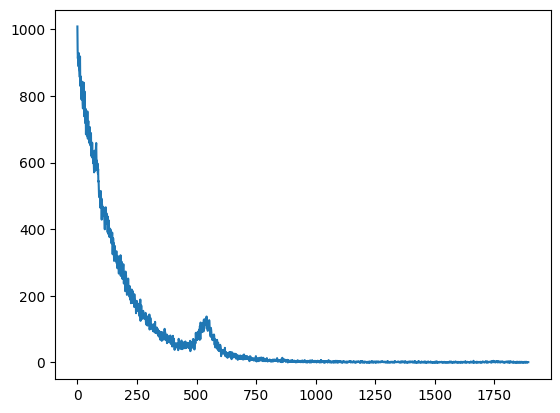

In [4]:
nBytes = len(dataPortion)
format = "<" + nBytes//8 * "d"
values = struct.unpack(f'<{"d"*(nBytes//8)}', dataPortion)
print(values)
plt.plot(values)
plt.show()